### Dieses Notebook zeigt ein einfaches Beispiel für ein flaches neuronales Netz zum Trainieren des MNIST-Datensatzes.

Laden der nötigen Bibliotheken:

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD, RMSprop, Adam 
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

Laden und Aufbereiten der Trainingsdaten:

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test,  10)

Definition des Neuronalen Netzes:
(Probieren Sie aus, wie sich das Netz verhält, wenn man statt 'relu' 'tanh' oder 'sigmoid' als Aktivierungsfunktion verwendet und wenn man L2-Regularisierung hinzufügt)

In [3]:
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(1500, activation='tanh'),
    Dense(1500, activation='tanh', kernel_regularizer=regularizers.L2(0.005)),
    Dense(10, activation='softmax')])

Ausgabe der Netzstruktur:

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1500)              1177500   
                                                                 
 dense_1 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_2 (Dense)             (None, 10)                15010     
                                                                 
Total params: 3,444,010
Trainable params: 3,444,010
Non-trainable params: 0
_________________________________________________________________


Erstellen des Netzes mit Optimierungsmethode (z.B. SGD, RMSprop oder Adam):

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Trainineren des Netzes:

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=6000,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 9s 784ms/step - loss: 8.0034 - accuracy: 0.6762 - val_loss: 6.5839 - val_accuracy: 0.8626
Epoch 2/50
10/10 [==============================] - 7s 715ms/step - loss: 5.7653 - accuracy: 0.8755 - val_loss: 4.7612 - val_accuracy: 0.9009
Epoch 3/50
10/10 [==============================] - 7s 713ms/step - loss: 4.0566 - accuracy: 0.9059 - val_loss: 3.2621 - val_accuracy: 0.9130
Epoch 4/50
10/10 [==============================] - 7s 710ms/step - loss: 2.7484 - accuracy: 0.9147 - val_loss: 2.1832 - val_accuracy: 0.9213
Epoch 5/50
10/10 [==============================] - 7s 707ms/step - loss: 1.8435 - accuracy: 0.9192 - val_loss: 1.4771 - val_accuracy: 0.9207
Epoch 6/50
10/10 [==============================] - 7s 731ms/step - loss: 1.2585 - accuracy: 0.9209 - val_loss: 1.0250 - val_accuracy: 0.9231
Epoch 7/50
10/10 [==============================] - 7s 732ms/step - loss: 0.8922 - accuracy: 0.9223 - val_loss: 0.7466 - val_accuracy: 0.9253
Epoch 

Berechnen und Bewerten der Netzausgabe nach dem Training:

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.16775071620941162
Test accuracy: 0.9596999883651733


Ausgabe des Netzfehlers während des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

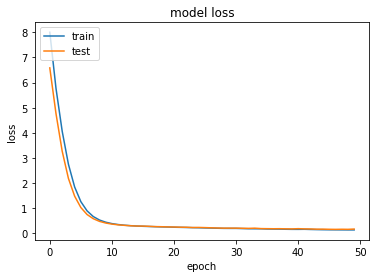

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ausgabe der Netz-Accuracy waehrend des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

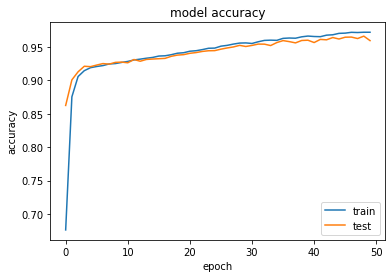

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Ausgabe der falsch klassifizierten Testdaten-Bilder:

In [10]:
# pred = model.predict(x_test)
# mask = ~(np.argmax(pred,axis=1)==np.argmax(y_test,axis=1))
# wrong_pred=pred[mask,:]
# wrong_label=np.argmax(wrong_pred,axis=1)
# wrong_y=y_test[mask,:]
# wrong_x=x_test[mask,:,:]
# print(wrong_pred.shape[0],'out of',pred.shape[0],'false classifications in test dataset (',int(wrong_pred.shape[0]/pred.shape[0]*10000)/100,'% )')

# for i in range(wrong_y.shape[0]):
#     plt.imshow(1-wrong_x[i,:,:],cmap='gray')
#     plt.title(str(np.argmax(wrong_y[i,:]))+' detected as '+str(wrong_label[i]))
#     plt.axis('off')
#     plt.show()